# Distinct Data Set Analysis

In the last notebook, we had a look at meta information of the whole data set (how many question asker/ presenter, are they male/female or Grad Student/PhD?) and also the maximum values of each attribute in the whole data set. We could see some tendencies towards samples varying for the same person, but could not be sure for some attributes, since the max value was calculated for the whole data set, including of persons, who only have one sample. This meant, that we could not see if for the same person, the values differ throughout the different samples.

For this, we now analyze only samples of persons, who have at least two different samples in the data set.

In [1]:
import numpy as np
import pandas as pd
from os import listdir
import matplotlib.pyplot as plt
import itertools as it
from statsmodels.sandbox.stats.multicomp import multipletests
import statsmodels.api as sm
#import nltk
import scipy.stats as st
import statsmodels.formula.api as smf
import seaborn as sns
import Helper as hp

#Load Data
data = pd.read_csv("CHI_2019_FULL.csv")

#Set Labels 
emotion_label = ['Anger', 'Boredom', 'Disgust', 'Fear', 'Happiness', 'Emo_Neutral', 'Sadness']
affect_label = ['Aggressiv', 'Cheerful', 'Intoxicated', 'Nervous', 'Aff_Neutral', 'Tired']
loi_label = ['Disinterest', 'Normal', 'High Interest']

#Get specific data and save it into new data frames
# We use the pandas .copy(deep=True) function to prevent the SettingWithCopyWarning we would otherwise get. Since we do
# not write, but only read from the data, the warning does not affect the data frames
df_emotion = data[['Anger', 'Boredom', 'Disgust', 'Fear', 'Happiness', 'Emo_Neutral', 'Sadness', 'Filename']].copy(deep=True)
df_affect = data[['Aggressiv', 'Cheerful', 'Intoxicated', 'Nervous', 'Aff_Neutral', 'Tired', 'Filename']].copy(deep=True)
df_loi = data[['Disinterest', 'Normal', 'High Interest', 'Filename']].copy(deep=True)
df_ar_val = data[['Arousal', 'Valence', 'Filename']].copy(deep=True)
#For further usage, we want to append the CharacterID as a column, which is saved with other information in the filename
#Since we only want the digits, we can remove all non-digit characters of the filename column and append the column to the df

df_emotion['Char_ID'] = df_emotion['Filename'].replace('\D+','', regex = True).copy(deep=True)
df_affect['Char_ID'] = df_affect['Filename'].replace('\D+','', regex = True).copy(deep=True)
df_loi['Char_ID'] = df_loi['Filename'].replace('\D+','', regex = True).copy(deep=True)
df_ar_val['Char_ID'] = df_ar_val['Filename'].replace('\D+','', regex = True).copy(deep=True)

#Load data about speakers
char_data = pd.read_csv("CHI_2019_CharacterData.csv")  

#Join above tables and Character Tables

#To Join DataFrames we have to cast the column on which we want to join to int, so that both columns have the same data type
char_data['ID'] = char_data['ID'].astype(int)
df_ar_val['Char_ID'] = df_ar_val['Char_ID'].astype(int)
df_emotion['Char_ID'] = df_emotion['Char_ID'].astype(int)
df_affect['Char_ID'] = df_affect['Char_ID'].astype(int)
df_loi['Char_ID'] = df_loi['Char_ID'].astype(int)

#Safe new data frames
df_ar_val_char = df_ar_val.merge(char_data, how = 'left', left_on='Char_ID', right_on='ID')
df_emotion_char = df_emotion.merge(char_data, how = 'left', left_on='Char_ID', right_on= 'ID')
df_affect_char = df_affect.merge(char_data, how = 'left', left_on='Char_ID', right_on= 'ID')
df_loi_char = df_loi.merge(char_data, how = 'left', left_on='Char_ID', right_on= 'ID')

In [2]:
duplicates = df_emotion_char.duplicated(subset = ['ID'], keep = False)
df_emotion_char = df_emotion_char[duplicates.values]

df_affect_char = df_affect_char[duplicates.values]

df_loi_char = df_loi_char[duplicates.values]

df_ar_val_char = df_ar_val_char[duplicates.values]

# Let's have a look at our duplicate samples

In the cells above, we constructed our data frame and then looked for duplicates, so that we could drop all non-duplicates, so that we can have a look at varying values between samples.

We'll start with emotion.

In [3]:
# Let's start with emotions, let's start with anger
anger = df_emotion_char['Anger'].idxmax()
anger_c_ID = df_emotion_char['ID'][anger]
anger_c_df = df_emotion_char.loc[df_emotion_char['ID'] == anger_c_ID]
anger_c_df = anger_c_df['Anger']

#Now do Boredom
boredom = df_emotion_char['Boredom'].idxmax()
bore_c_ID = df_emotion_char['ID'][boredom]
bore_c_df = df_emotion_char.loc[df_emotion_char['ID'] == bore_c_ID]
bore_c_df = bore_c_df['Boredom']

#Now do Disgust
disgust = df_emotion_char['Disgust'].idxmax()
disg_c_ID = df_emotion_char['ID'][disgust]
disg_c_df = df_emotion_char.loc[df_emotion_char['ID'] == disg_c_ID]
disg_c_df = disg_c_df['Disgust']

#Now to Fear
fear = df_emotion_char['Fear'].idxmax()
fear_c_ID = df_emotion_char['ID'][fear]
fear_c_df = df_emotion_char.loc[df_emotion_char['ID'] == fear_c_ID]
fear_c_df = fear_c_df['Fear']

#Now to Happiness
happy = df_emotion_char['Happiness'].idxmax()
happy_c_ID = df_emotion_char['ID'][happy]
happy_c_df = df_emotion_char.loc[df_emotion_char['ID'] == happy_c_ID]
happy_c_df = happy_c_df['Happiness']

#Now to Emo_Neutral
emo_n = df_emotion_char['Emo_Neutral'].idxmax()
emo_n_c_ID = df_emotion_char['ID'][emo_n]
emo_n_c_df = df_emotion_char.loc[df_emotion_char['ID'] == emo_n_c_ID]
emo_n_c_df = emo_n_c_df['Emo_Neutral']

#Now to Sadness
sad = df_emotion_char['Sadness'].idxmax()
sad_c_ID = df_emotion_char['ID'][sad]
sad_c_df = df_emotion_char.loc[df_emotion_char['ID'] == sad_c_ID]
sad_c_df = sad_c_df['Sadness']

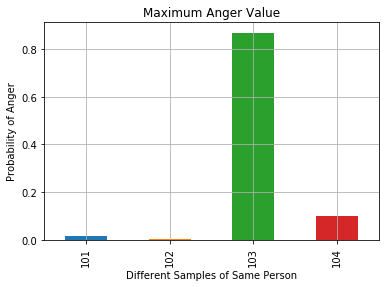

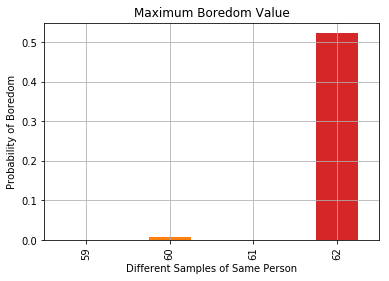

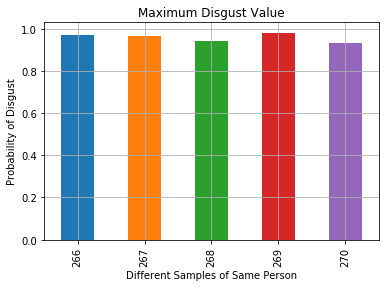

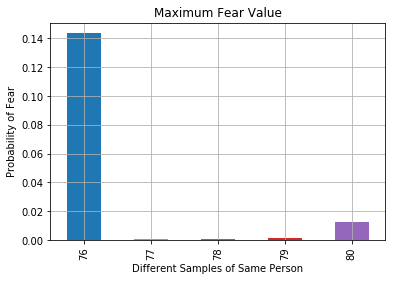

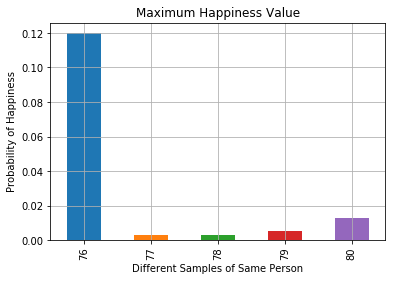

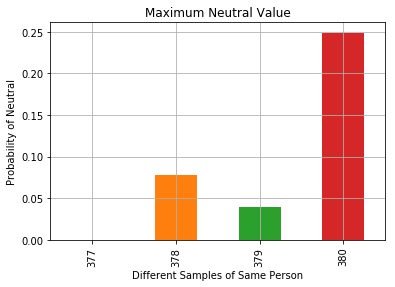

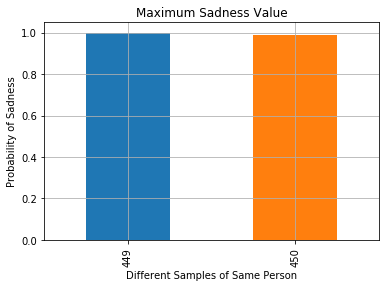

In [4]:
ax_anger = anger_c_df.plot.bar(title = 'Maximum Anger Value')
ax_anger.set_ylabel('Probability of Anger')
ax_anger.set_xlabel('Different Samples of Same Person')
plt.grid(True)
plt.show()

ax_bore = bore_c_df.plot.bar(title = 'Maximum Boredom Value')
ax_bore.set_ylabel('Probability of Boredom')
ax_bore.set_xlabel('Different Samples of Same Person')
plt.grid(True)
plt.show()

ax_disg = disg_c_df.plot.bar(title = 'Maximum Disgust Value')
ax_disg.set_ylabel('Probability of Disgust')
ax_disg.set_xlabel('Different Samples of Same Person')
plt.grid(True)
plt.show()

ax_fear = fear_c_df.plot.bar(title = 'Maximum Fear Value')
ax_fear.set_ylabel('Probability of Fear')
ax_fear.set_xlabel('Different Samples of Same Person')
plt.grid(True)
plt.show()

ax_happy = happy_c_df.plot.bar(title = 'Maximum Happiness Value')
ax_happy.set_ylabel('Probability of Happiness')
ax_happy.set_xlabel('Different Samples of Same Person')
plt.grid(True)
plt.show()

ax_emo_neu = emo_n_c_df.plot.bar(title = 'Maximum Neutral Value')
ax_emo_neu.set_ylabel('Probability of Neutral')
ax_emo_neu.set_xlabel('Different Samples of Same Person')
plt.grid(True)
plt.show()


ax_sad = sad_c_df.plot.bar(title = 'Maximum Sadness Value')
ax_sad.set_ylabel('Probability of Sadness')
ax_sad.set_xlabel('Different Samples of Same Person')
plt.grid(True)
plt.show()

As expected, the first three plots stay the same, as in the notebook before the max values were found in persons with more samples. Fear tends to vary as the attributes before, but the range is smaller. The maximum fear value is at about 0.15, which is lower than before, where the maximum fear value was ~0.25. Note, that the 0.25 is a result of only one sample of one person, so maybe it could also vary if more samples were given. 

The neutral value varies also, as the max value is at about 0.25 (which is almost equal to the previous max value). The variation between samples can be seen here, as the first sample indicates that neutrality is non-existent, whereas in the other samples the bar is visible in the plot.

The maximum sadness value is again (as in the previous notebook) almost 1. Unlike the other attributes, sadness does not seem to vary that much (although here are only two samples). If we take a look at the plots in the 'General Analysis CHI' folder in the Plots-notebook, we can see that the means are much higher for sadness and disgust than for e.g. happiness. This may also be because the samples do not vary as much as other attributes.

Now let's have a look at affect.

In [5]:
# Let's start with Aggressiv
agg = df_affect_char['Aggressiv'].idxmax()
agg_c_ID = df_affect_char['ID'][agg]
agg_c_df = df_affect_char.loc[df_affect_char['ID'] == agg_c_ID]
agg_c_df = agg_c_df['Aggressiv']

#Now do Cheerful
cheer = df_affect_char['Cheerful'].idxmax()
cheer_c_ID = df_affect_char['ID'][cheer]
cheer_c_df = df_affect_char.loc[df_affect_char['ID'] == cheer_c_ID]
cheer_c_df = cheer_c_df['Cheerful']

#Now do Intoxicated
intoxi = df_affect_char['Intoxicated'].idxmax()
intoxi_c_ID = df_affect_char['ID'][intoxi]
intoxi_c_df = df_affect_char.loc[df_affect_char['ID'] == intoxi_c_ID]
intoxi_c_df = intoxi_c_df['Intoxicated']

#Now to Nervous
nerv = df_affect_char['Nervous'].idxmax()
nerv_c_ID = df_affect_char['ID'][nerv]
nerv_c_df = df_affect_char.loc[df_affect_char['ID'] == nerv_c_ID]
nerv_c_df = nerv_c_df['Nervous']

#Now to Aff_Neutral
aff_n = df_affect_char['Aff_Neutral'].idxmax()
aff_n_c_ID = df_affect_char['ID'][aff_n]
aff_n_c_df = df_affect_char.loc[df_affect_char['ID'] == aff_n_c_ID]
aff_n_c_df = aff_n_c_df['Aff_Neutral']

#Now to Tired
tired = df_affect_char['Tired'].idxmax()
tired_c_ID = df_affect_char['ID'][tired]
tired_c_df = df_affect_char.loc[df_affect_char['ID'] == tired_c_ID]
tired_c_df = tired_c_df['Tired']

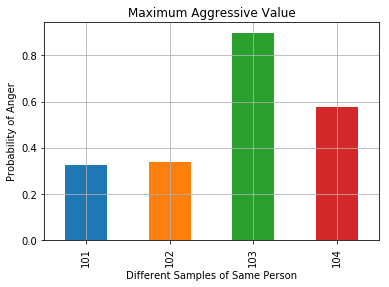

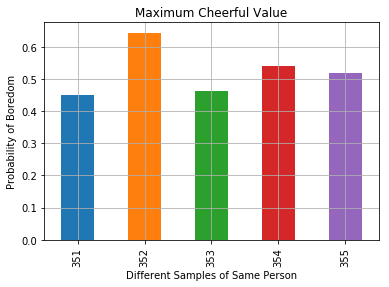

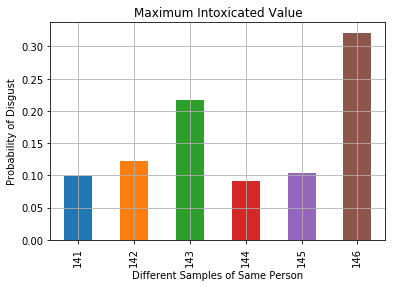

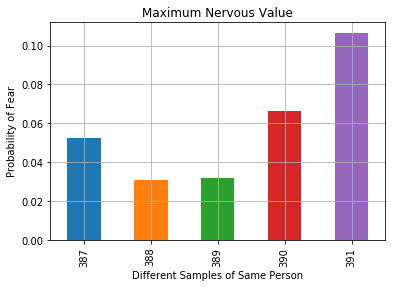

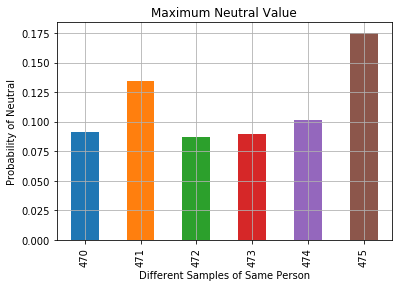

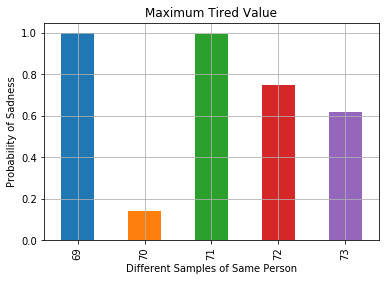

In [6]:
ax_agg = agg_c_df.plot.bar(title = 'Maximum Aggressive Value')
ax_agg.set_ylabel('Probability of Anger')
ax_agg.set_xlabel('Different Samples of Same Person')
plt.grid(True)
plt.show()

ax_cheer = cheer_c_df.plot.bar(title = 'Maximum Cheerful Value')
ax_cheer.set_ylabel('Probability of Boredom')
ax_cheer.set_xlabel('Different Samples of Same Person')
plt.grid(True)
plt.show()

ax_intoxi = intoxi_c_df.plot.bar(title = 'Maximum Intoxicated Value')
ax_intoxi.set_ylabel('Probability of Disgust')
ax_intoxi.set_xlabel('Different Samples of Same Person')
plt.grid(True)
plt.show()

ax_nerv = nerv_c_df.plot.bar(title = 'Maximum Nervous Value')
ax_nerv.set_ylabel('Probability of Fear')
ax_nerv.set_xlabel('Different Samples of Same Person')
plt.grid(True)
plt.show()

ax_aff_neu = aff_n_c_df.plot.bar(title = 'Maximum Neutral Value')
ax_aff_neu.set_ylabel('Probability of Neutral')
ax_aff_neu.set_xlabel('Different Samples of Same Person')
plt.grid(True)
plt.show()

ax_tired = tired_c_df.plot.bar(title = 'Maximum Tired Value')
ax_tired.set_ylabel('Probability of Sadness')
ax_tired.set_xlabel('Different Samples of Same Person')
plt.grid(True)
plt.show()

The first two plots are the same as in the previous notebook, but intoxication, nervous and neutral plots have changed.

In the Intoxication plot we can see that the values vary between samples and the maximum value is at about 0.33. To compare, the previous maximum value of intoxication was at ~0.48. The maximum nervous value is ~ 0.11 and again varies between samples. Again, this indicates a nice atmosphere, so that nervous was never the highest attribute.
The values of neutral affect also vary between samples of the same person, although the scale is much smaller and thus the range of variation is smaller. Note that these assumption are not generally speaking, but only for the specific person who has the maximum value in an attribute.

Let's move on to Level of Interest.

In [7]:
#Now to Disinterest
disinterest = df_loi_char['Disinterest'].idxmax()
disinterest_c_ID = df_loi_char['ID'][disinterest]
disinterest_c_df = df_loi_char.loc[df_loi_char['ID'] == disinterest_c_ID]
disinterest_c_df = disinterest_c_df['Disinterest']

#Now to Normal Interest
normal = df_loi_char['Normal'].idxmax()
normal_c_ID = df_loi_char['ID'][normal]
normal_c_df = df_loi_char.loc[df_loi_char['ID'] == normal_c_ID]
normal_c_df = normal_c_df['Normal']

#Now to High Interest
interest = df_loi_char['High Interest'].idxmax()
interest_c_ID = df_loi_char['ID'][interest]
interest_c_df = df_loi_char.loc[df_loi_char['ID'] == interest_c_ID]
interest_c_df = interest_c_df['High Interest']



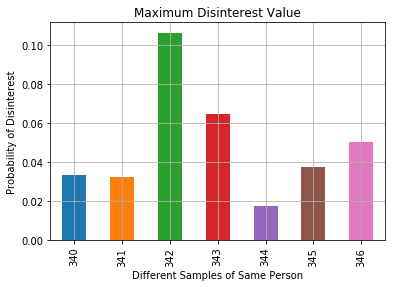

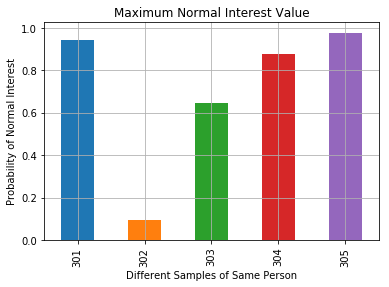

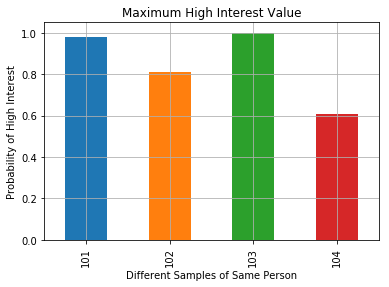

In [8]:
ax_disinterest = disinterest_c_df.plot.bar(title = 'Maximum Disinterest Value')
ax_disinterest.set_ylabel('Probability of Disinterest')
ax_disinterest.set_xlabel('Different Samples of Same Person')
plt.grid(True)
plt.show()

ax_normal = normal_c_df.plot.bar(title = 'Maximum Normal Interest Value')
ax_normal.set_ylabel('Probability of Normal Interest')
ax_normal.set_xlabel('Different Samples of Same Person')
plt.grid(True)
plt.show()

ax_interest = interest_c_df.plot.bar(title = 'Maximum High Interest Value')
ax_interest.set_ylabel('Probability of High Interest')
ax_interest.set_xlabel('Different Samples of Same Person')
plt.grid(True)
plt.show()

The maximum disinterest value here is at about 0.11, which is ~0.04 lower than before. Here we can see that disinterest varies between samples, but 'only' between 0.1 point. The variation is higher when we look at the normal interest plot. Here we see that the max value is at ~0.98 but the same person has their minimum value at 0.1. This is a wider range than disinterest, which can be explained by looking at the high interest values. The maximum value is at ~1.0 and the values vary, but not as much as normal interest.  

Now let's move on to arousal and valence.

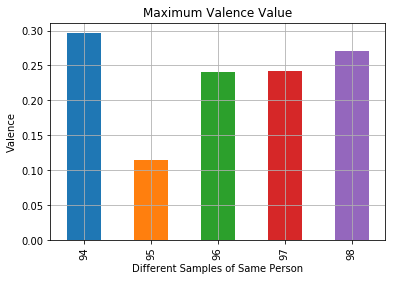

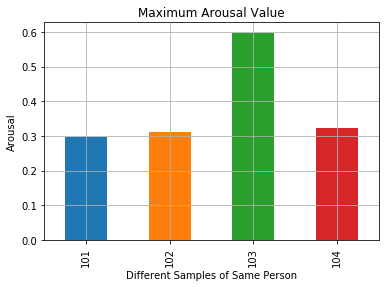

In [9]:
valence = df_ar_val_char['Valence'].idxmax()
valence_c_ID = df_ar_val_char['ID'][valence]
valence_c_df = df_ar_val_char.loc[df_ar_val_char['ID'] == valence_c_ID]
valence_c_df = valence_c_df['Valence']

arousal = df_ar_val_char['Arousal'].idxmax()
arousal_c_ID = df_ar_val_char['ID'][arousal]
arousal_c_df = df_ar_val_char.loc[df_ar_val_char['ID'] == arousal_c_ID]
arousal_c_df = arousal_c_df['Arousal']

ax_valence = valence_c_df.plot.bar(title = 'Maximum Valence Value')
ax_valence.set_ylabel('Valence')
ax_valence.set_xlabel('Different Samples of Same Person')
plt.grid(True)
plt.show()

ax_arousal = arousal_c_df.plot.bar(title = 'Maximum Arousal Value')
ax_arousal.set_ylabel('Arousal')
ax_arousal.set_xlabel('Different Samples of Same Person')
plt.grid(True)
plt.show()

As seen in the plots before, arousal and valence also vary between samples of the same person. The maximum valence value is similar to before, but the maximum arousal value is ~0.2 points lower.

So we can say that just because a person has a maximum value in one attribute in one sample does not mean that the other samples are equally high, but vary. The most extreme cases are within the emotion space. Often only the maximum sample is visible well, whereas the other samples are barely visible.

Now let's have a look at more plots of the data set. Go to General Analysis/ Analysis Plots.